In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing
df = pd.read_csv("cleaned_data_set_immoweb.csv")

In [10]:
df = pd.read_csv("cleaned_data_set_immoweb.csv")
#We look at our dataframe 


In [11]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
df=df.drop(['Province','State_of_the_building','Type_of_property'], axis=1)

X=df.drop(['Price'], axis=1)
y=df['Price']

In [13]:
df.dtypes

Postal_code                         int64
Subtype_of_property                 int64
Price                               int64
Number_of_rooms                     int64
Living_Area                         int64
Fully_equipped_kitchen              int64
Terrace_Area                        int64
Garden_Area                         int64
Surface_area_of_the_plot_of_land    int64
dtype: object

In [14]:
df.columns

Index(['Postal_code', 'Subtype_of_property', 'Price', 'Number_of_rooms',
       'Living_Area', 'Fully_equipped_kitchen', 'Terrace_Area', 'Garden_Area',
       'Surface_area_of_the_plot_of_land'],
      dtype='object')

In [15]:
df.isnull().sum()

Postal_code                         0
Subtype_of_property                 0
Price                               0
Number_of_rooms                     0
Living_Area                         0
Fully_equipped_kitchen              0
Terrace_Area                        0
Garden_Area                         0
Surface_area_of_the_plot_of_land    0
dtype: int64

In [16]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# train an XGBoost regressor on the training data
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=0)
xgb_model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = xgb_model.predict(X_test)

# evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 91857.26534536348


In [17]:
xgb_model.score(X_test,y_test)

0.7570283618143483

In [18]:
xgb_model.score(X_train,y_train)

0.909010115731875

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [74]:
X.shape

(15785, 10)

In [19]:
regressor_RandomForest = RandomForestRegressor(n_estimators=40,random_state=42) 
regressor_RandomForest.fit(X_train,y_train)
RandomForest_pred =regressor_RandomForest.predict(X_test)

# Score
rf_score=regressor_RandomForest.score(X_test,y_test)
print('Score:', rf_score)

Score: 0.7350342243878341


In [123]:
regressor_RandomForest.score(X_train,y_train)

0.9590576759197278

some trials we've seen NO improvement

We know that Number of rooms and living area are correlated. Let's see if there's an effect of multicollinearity. We'll delete Number of rooms. 

In [52]:
X=df.drop(['Number_of_rooms'], axis=1)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [55]:
X.head()

,Postal_code,Type_of_property,Subtype_of_property,Price,Living_Area,Fully_equipped_kitchen,Terrace_Area,Garden_Area,Surface_area_of_the_plot_of_land,State_of_the_building
0,1130,1,1,450000,156,1,43,0,0,4
1,1140,1,1,450000,156,1,43,0,0,4
2,1180,1,2,485000,107,1,17,0,0,1
3,1000,1,3,460000,147,1,52,0,0,4
4,1340,1,2,475000,115,0,20,0,0,1


In [56]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

rf_regressor = RandomForestRegressor(n_estimators=40,random_state=42) #28 et 42
rf_regressor.fit(X_train,y_train)
rf_pred =rf_regressor.predict(X_test)

# Score
rf_score=rf_regressor.score(X_test,y_test)
print('Score:', rf_score)

Score: 0.9999979522429064


In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_standardized = scaler.transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [79]:
lin_regressor = LinearRegression()
lin_regressor.fit(X_train_standardized, y_train)


LinearRegression()

In [81]:
lin_regressor.score(X_test_standardized,y_test)

-0.2866251973839551

In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

# dividing dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
    
# Train the model
rf_regressor = GradientBoostingRegressor(n_estimators=40,random_state=42) #28 et 42
rf_regressor.fit(X_train,y_train)
rf_pred =rf_regressor.predict(X_test)

# Score
rf_score=rf_regressor.score(X_test,y_test)
print('Score:', rf_score)

In [353]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [356]:
from sklearn.ensemble import RandomForestRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

rf_regressor = RandomForestRegressor(n_estimators=40,random_state=42) #28 et 42
rf_regressor.fit(X_train,y_train)
rf_pred =rf_regressor.predict(X_test)

# Score
rf_score=rf_regressor.score(X_test,y_test)
print('Score:', rf_score)

Score: 0.710694508417729


In [292]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
# Get the columns name
#columns_name = ['Type_of_property','Subtype_of_property','Fully_equipped_kitchen','Terrace','Garden']
#columns_name= ['Type_of_property', 'Subtype_of_property', 'State_of_the_building', 'Fully_equipped_kitchen']
# Label encode them
#X = pd.get_dummies(X, columns=columns_name, prefix=columns_name, drop_first=False)

#JUST FOR TESTING (FROM Sebastien)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
# Random Forest Regressor

    
# Train the model
rf_regressor = RandomForestRegressor(n_estimators=40,random_state=42) #28 et 42
rf_regressor.fit(X_train,y_train)
rf_pred =rf_regressor.predict(X_test)

# Score
rf_score=rf_regressor.score(X_test,y_test)
print('Score:', rf_score)

# df.isnull().sum()
#df['Surface_area_of_the_plot_of_land']=df['Surface_area_of_the_plot_of_land'].fillna(0, inplace=True)
# df['Surface_area_of_the_plot_of_land']=df['Surface_area_of_the_plot_of_land'].astype(float)

KeyError: "None of [Index(['Type_of_property', 'Subtype_of_property', 'State_of_the_building',\n       'Fully_equipped_kitchen'],\n      dtype='object')] are in the [columns]"

In [283]:
X.head()

,Postal_code,Number_of_rooms,Living_Area,Terrace_Area,Surface_area_of_the_plot_of_land,Type_of_property_1,Type_of_property_2,Subtype_of_property_APARTMENT,Subtype_of_property_APARTMENT_BLOCK,Subtype_of_property_BUNGALOW,...,Subtype_of_property_PENTHOUSE,Subtype_of_property_SERVICE_FLAT,Subtype_of_property_TOWN_HOUSE,Subtype_of_property_TRIPLEX,Subtype_of_property_VILLA,Fully_equipped_kitchen_HYPER,Fully_equipped_kitchen_LOW,Fully_equipped_kitchen_SEMI,Terrace_True,Garden_True
0,1130,3,156,43.0,0.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
1,1140,3,156,43.0,0.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
2,1180,2,107,17.0,0.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,1000,3,147,52.0,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1340,3,115,20.0,0.0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1


In [288]:
#from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
# Get the columns name
columns_name = ['Type_of_property','Subtype_of_property','Fully_equipped_kitchen','Terrace','Garden']
# Label encode them
X = pd.get_dummies(X, columns=columns_name, prefix=columns_name, drop_first=False)

#JUST FOR TESTING (FROM Sebastien)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
# Random Forest Regressor

    
# Train the model
rf_regressor = GradientBoostingRegressor(n_estimators=40,random_state=42) #28 et 42
rf_regressor.fit(X_train,y_train)
rf_pred =rf_regressor.predict(X_test)

# Score
rf_score=rf_regressor.score(X_test,y_test)
print('Score:', rf_score)

Score: 0.5765569798651555


In [289]:
X.head()

,Postal_code,Number_of_rooms,Living_Area,Terrace_Area,Surface_area_of_the_plot_of_land,Type_of_property_1,Type_of_property_2,Subtype_of_property_APARTMENT,Subtype_of_property_APARTMENT_BLOCK,Subtype_of_property_BUNGALOW,...,Subtype_of_property_PENTHOUSE,Subtype_of_property_SERVICE_FLAT,Subtype_of_property_TOWN_HOUSE,Subtype_of_property_TRIPLEX,Subtype_of_property_VILLA,Fully_equipped_kitchen_HYPER,Fully_equipped_kitchen_LOW,Fully_equipped_kitchen_SEMI,Terrace_True,Garden_True
0,1130,3,156,43.0,0.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
1,1140,3,156,43.0,0.0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,1
2,1180,2,107,17.0,0.0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
3,1000,3,147,52.0,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
4,1340,3,115,20.0,0.0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,1,1


In [213]:
df.tail()

,Postal_code,Province,Type_of_property,Subtype_of_property,Price,Number_of_rooms,Living_Area,Fully_equipped_kitchen,Furnished,Open_fire,Terrace,Terrace_Area,Garden,Garden_Area,Surface_area_of_the_plot_of_land,Number_of_facades,Swimming_pool,State_of_the_building
15000,8370,West Flanders,APARTMENT,APARTMENT,314500,2,83,LOW,False,False,False,10,False,0,NaN,NaN,NaN,NaN
15001,8370,West Flanders,APARTMENT,APARTMENT,314500,2,86,LOW,False,False,False,10,False,0,NaN,NaN,NaN,NaN
15002,8370,West Flanders,APARTMENT,APARTMENT,317000,2,80,LOW,False,False,False,8,False,0,NaN,2.0,NaN,NaN
15003,8370,West Flanders,APARTMENT,APARTMENT,317000,2,83,LOW,False,False,False,7,False,0,NaN,2.0,NaN,NaN
15004,8370,West Flanders,APARTMENT,APARTMENT,317000,2,83,LOW,False,False,False,10,False,0,NaN,NaN,NaN,NaN


In [262]:
df.isnull().sum()

Postal_code                            0
Province                               0
Type_of_property                       0
Subtype_of_property                    0
Price                                  0
Number_of_rooms                        0
Living_Area                            0
Fully_equipped_kitchen                 0
Furnished                              0
Open_fire                              0
Terrace                                0
Terrace_Area                           0
Garden                                 0
Garden_Area                            0
Surface_area_of_the_plot_of_land       0
Number_of_facades                   3777
Swimming_pool                       6643
State_of_the_building               2937
dtype: int64

In [263]:
df.dtypes

Postal_code                           int64
Province                             object
Type_of_property                      int64
Subtype_of_property                  object
Price                                 int64
Number_of_rooms                       int64
Living_Area                           int32
Fully_equipped_kitchen               object
Furnished                              bool
Open_fire                              bool
Terrace                                bool
Terrace_Area                        float64
Garden                                 bool
Garden_Area                         float64
Surface_area_of_the_plot_of_land    float64
Number_of_facades                   float64
Swimming_pool                        object
State_of_the_building                object
dtype: object

In [261]:
df.columns

Index(['Postal_code', 'Province', 'Type_of_property', 'Subtype_of_property',
       'Price', 'Number_of_rooms', 'Living_Area', 'Fully_equipped_kitchen',
       'Furnished', 'Open_fire', 'Terrace', 'Terrace_Area', 'Garden',
       'Garden_Area', 'Surface_area_of_the_plot_of_land', 'Number_of_facades',
       'Swimming_pool', 'State_of_the_building'],
      dtype='object')

C:\Users\nacit\AppData\Local\Temp\ipykernel_7888\529717881.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

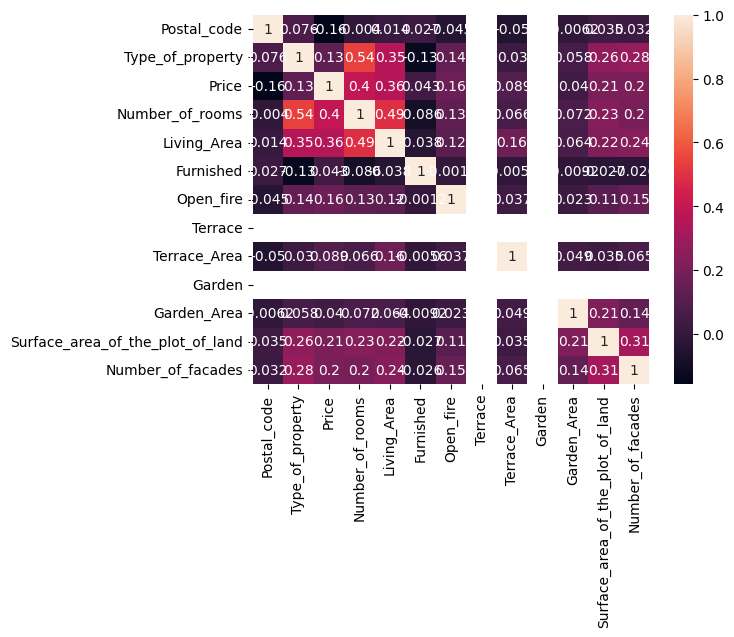

In [264]:

sns.heatmap(df.corr(),annot=True)

In [182]:
df.isnull().sum()

Postal_code                            0
Province                               0
Type_of_property                       0
Subtype_of_property                    0
Price                                  0
Number_of_rooms                        0
Living_Area                            0
Fully_equipped_kitchen                 0
Furnished                           3027
Open_fire                              0
Terrace                             4798
Terrace_Area                           0
Garden                              9221
Garden_Area                            0
Surface_area_of_the_plot_of_land    6781
Number_of_facades                   3777
Swimming_pool                       6643
State_of_the_building               2937
dtype: int64

Low outliers? Remove, if they represent more than 10% of dataset... Then you cannot just delete it. 

Observations: 
- We see that there are 7338 misisng values for surface area of the land. Those missing values are probably from apartments. When we check the entries of apartments we see exactly 7338 entries. 
- There are a lot of unique values for the columns Garden and Terrace, and this column is also highly dependent on being a house or an apartment. 

Those observations suggest that it's better to split the dataframe in houses and apartments and to make several price predictions. Before doing the split, it's good to do some feature engineering which will have an affect on both property types. 

We will add region Brussel and 10 other provinces as a column 'provinces' according to their postal_code. Furthermore, we'll add an extra column USA_kitchen which will be 1 if there's any kitchen of a USA-style (whether it's fully equipped or not). Our previous datashet showed us that this could have an affect in our sale price so we would like to include this in our model.

In [265]:
df.head()

,Postal_code,Province,Type_of_property,Subtype_of_property,Price,Number_of_rooms,Living_Area,Fully_equipped_kitchen,Furnished,Open_fire,Terrace,Terrace_Area,Garden,Garden_Area,Surface_area_of_the_plot_of_land,Number_of_facades,Swimming_pool,State_of_the_building
0,1130,Brussels,1,PENTHOUSE,450000,3,156,HYPER,False,False,True,43.0,True,0.0,0.0,4.0,NaN,NaN
1,1140,Brussels,1,PENTHOUSE,450000,3,156,HYPER,False,False,True,43.0,True,0.0,0.0,4.0,NaN,NaN
2,1180,Brussels,1,APARTMENT,485000,2,107,HYPER,False,False,True,17.0,True,0.0,0.0,NaN,False,AS_NEW
3,1000,Brussels,1,DUPLEX,460000,3,147,HYPER,False,False,True,52.0,True,0.0,0.0,2.0,NaN,NaN
4,1340,Walloon Brabant,1,APARTMENT,475000,3,115,LOW,False,False,True,20.0,True,0.0,0.0,NaN,NaN,AS_NEW


In [266]:
df.shape

(15005, 18)

In [267]:
df_ap=df[df.Type_of_property=='APARTMENT']
df_house=df[df.Type_of_property=='HOUSE']

We continue with houses

In [268]:
df_house.describe(include=object)

,Province,Subtype_of_property,Fully_equipped_kitchen,Swimming_pool,State_of_the_building
count,0,0,0,0,0
unique,0,0,0,0,0
top,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN


In [101]:
corr=df_ap.corr()
corr.Price 

C:\Users\nacit\AppData\Local\Temp\ipykernel_7888\87300179.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df_ap.corr()


Postal_code                        -0.069997
Price                               1.000000
Number_of_rooms                     0.419843
Living_Area                         0.175046
Open_fire                           0.096877
Terrace_Area                        0.260947
Garden_Area                        -0.094942
Surface_area_of_the_plot_of_land         NaN
Number_of_facades                   0.026987
Name: Price, dtype: float64

According to our correlations we will keep the following columns: Province, Number_of_rooms, Living_Area, Terrace_Area, Surface_area.

In [140]:
df_house.shape

(8224, 18)

According to our correlations we will keep the following columns: Number_of_rooms, Living_Area, Terrace_Area. We keep the values which have a high correlation. For the categorical values, we can't calculate the correlation. We will try another approach. 
To determine the correlation between a categorical variable (such as Province) and a numerical variable (such as Price) using a technique called chi-squared test for independence

The p-value is very small (<0.05) and says that the probability of this distribution in case of no association between the two variables is almost 0. This is hence a feature we would like to keep. Let's do the same for 

In [103]:
from scipy.stats import chi2_contingency
# Create a contingency table
contingency_table = pd.crosstab(df_ap['Subtype_of_property'], df_ap['Price'])

# Calculate the chi-squared test for independence
stat, p, dof, expected = chi2_contingency(contingency_table, correction=False)

#print p-value
print(p)

1.0836869765712786e-28


Subtype and Province have high impact

We can say that this is significant too and hence we'll use this feature in our dataset. 

Lastly we'll have a look on subtype of property: 


In [90]:
# Create a contingency table
contingency_table4 = pd.crosstab(df_ap['Subtype_of_property'], df_ap['Price'])

# Calculate the chi-squared test for independence
stat4, p4, dof4, expected4 = chi2_contingency(contingency_table4, correction=False)

#print p-value
print(p4)

1.0836869765712786e-28


PART 2: PREPROCESSING

In [141]:
columns_to_keep = ['Price','Subtype_of_property','Province','Postal_code','Terrace_Area','Number_of_rooms', 'Living_Area','Fully_equipped_kitchen', 'Surface_area_of_the_plot_of_land','Garden_Area']
df_house=df_house[columns_to_keep]






In [92]:
df_house.head()

,Price,Subtype_of_property,Province,Terrace_Area,Living_Area,Fully_equipped_kitchen,Surface_area_of_the_plot_of_land
4251,450000,HOUSE,Brussels,25.0,110.0,INSTALLED,173.0
4252,649000,HOUSE,Flemish Brabant,NaN,243.0,USA_HYPER_EQUIPPED,1000.0
4253,299000,APARTMENT_BLOCK,Liège,NaN,239.0,NOT_INSTALLED,108.0
4254,335000,HOUSE,Walloon Brabant,10.0,120.0,INSTALLED,790.0
4255,349000,HOUSE,Liège,15.0,218.0,INSTALLED,217.0


In [128]:
df_house.isnull().sum()

Price                                  0
Subtype_of_property                    0
Province                               0
Postal_code                            0
Terrace_Area                        5212
Number_of_rooms                        0
Living_Area                          423
Fully_equipped_kitchen              1850
Surface_area_of_the_plot_of_land       0
dtype: int64

In [142]:
df_house=df_house[(df_house.Number_of_rooms > 0) & (df_house.Number_of_rooms<11)]

#df_ap.to_csv("test.csv")

We first want to deal with the missing values for Living area, fully equipped kitchen and terrace area. 

In [143]:
df_house.Number_of_rooms.value_counts()

3     3363
4     2128
2     1116
5      893
6      321
7      109
1      105
8       49
9       36
10      22
Name: Number_of_rooms, dtype: int64

We consider only ap till 6 bedrooms.   (ENTER IN LIMITATION) WRITE A FUNCTION TO DO THINGS IN AN EFFICIENT WAY

In [144]:
df_house=df_house[(df_house.Number_of_rooms > 0) & (df_house.Number_of_rooms<11)]

In [145]:
df_house['Living_Area'] = df_house['Living_Area'].fillna(df_house.groupby('Number_of_rooms')['Living_Area'].transform('mean'))

In [146]:
df_house.isnull().sum()

Price                                  0
Subtype_of_property                    0
Province                               0
Postal_code                            0
Terrace_Area                        5143
Number_of_rooms                        0
Living_Area                            0
Fully_equipped_kitchen              1808
Surface_area_of_the_plot_of_land       0
Garden_Area                         4957
dtype: int64

TRY ALSO MEAN

In [147]:
df_house['Terrace_Area'].fillna(0, inplace=True)
df_house['Terrace_Area']=df_house['Terrace_Area'].astype(int)


In [148]:
df_house['Garden_Area'].fillna(0, inplace=True)
df_house['Garden_Area']=df_house['Garden_Area'].astype(int)

In [149]:
df_house.isnull().sum()

Price                                  0
Subtype_of_property                    0
Province                               0
Postal_code                            0
Terrace_Area                           0
Number_of_rooms                        0
Living_Area                            0
Fully_equipped_kitchen              1808
Surface_area_of_the_plot_of_land       0
Garden_Area                            0
dtype: int64

In [29]:
# fill missing values in Living_Area column with value depending on BEDROOMS column

#df_house['Living_Area'] = df_house['Living_Area'].fillna(df_house.groupby('Number_of_rooms')['Living_Area'].transform('mean'))



In [150]:
df_house['Living_Area']=df_house['Living_Area'].astype(int)


In [151]:
df_house.isnull().sum()

Price                                  0
Subtype_of_property                    0
Province                               0
Postal_code                            0
Terrace_Area                           0
Number_of_rooms                        0
Living_Area                            0
Fully_equipped_kitchen              1808
Surface_area_of_the_plot_of_land       0
Garden_Area                            0
dtype: int64

In [152]:
df_house = df_house.replace({"Fully_equipped_kitchen":{"NOT_INSTALLED": "LOW", "INSTALLED": "LOW", "SEMI_EQUIPPED": "SEMI", "HYPER_EQUIPPED": "HYPER", "USA_UNINSTALLED": "LOW", "USA_INSTALLED": "LOW", "USA_SEMI_EQUIPPED": "SEMI", "USA_HYPER_EQUIPPED": "HYPER"}})
df_house["Fully_equipped_kitchen"].fillna("LOW", inplace=True)

When making such changes it's always advises to check your values back. I had some problems before converting to integers.

In [153]:
df_house.head()

,Price,Subtype_of_property,Province,Postal_code,Terrace_Area,Number_of_rooms,Living_Area,Fully_equipped_kitchen,Surface_area_of_the_plot_of_land,Garden_Area
4251,450000,HOUSE,Brussels,1120,25,3,110,LOW,173.0,120
4252,649000,HOUSE,Flemish Brabant,1700,0,4,243,HYPER,1000.0,0
4253,299000,APARTMENT_BLOCK,Liège,4000,0,4,239,LOW,108.0,0
4254,335000,HOUSE,Walloon Brabant,1470,10,4,120,LOW,790.0,654
4255,349000,HOUSE,Liège,4000,15,4,218,LOW,217.0,120


In [154]:
df_house.dtypes

Price                                 int64
Subtype_of_property                  object
Province                             object
Postal_code                           int64
Terrace_Area                          int32
Number_of_rooms                       int64
Living_Area                           int32
Fully_equipped_kitchen               object
Surface_area_of_the_plot_of_land    float64
Garden_Area                           int32
dtype: object

For the living area we suppose there is no terrace so we change the value by 0. 

We see there are not many USA_type kitchens. We can add them together to categorize it better: 



In [155]:
df_house.isnull().sum()

Price                               0
Subtype_of_property                 0
Province                            0
Postal_code                         0
Terrace_Area                        0
Number_of_rooms                     0
Living_Area                         0
Fully_equipped_kitchen              0
Surface_area_of_the_plot_of_land    0
Garden_Area                         0
dtype: int64

In [156]:
df_house.to_csv("cleanHOUSE.csv")

PART 3: MODEL SELECTION? 

In [158]:
df_house.columns

Index(['Price', 'Subtype_of_property', 'Province', 'Postal_code',
       'Terrace_Area', 'Number_of_rooms', 'Living_Area',
       'Fully_equipped_kitchen', 'Surface_area_of_the_plot_of_land',
       'Garden_Area'],
      dtype='object')

In [166]:
X=df_house.drop(['Price','Garden_Area','Province'], axis=1)
y=df_house['Price']

# Get the columns name
columns_name = ['Subtype_of_property','Fully_equipped_kitchen']
# Label encode them
X = pd.get_dummies(X, columns=columns_name, prefix=columns_name, drop_first=False)

#Numpy? 

In [177]:
X.head()

,Postal_code,Terrace_Area,Number_of_rooms,Living_Area,Surface_area_of_the_plot_of_land,Subtype_of_property_APARTMENT_BLOCK,Subtype_of_property_BUNGALOW,Subtype_of_property_CASTLE,Subtype_of_property_CHALET,Subtype_of_property_COUNTRY_COTTAGE,...,Subtype_of_property_HOUSE,Subtype_of_property_MANOR_HOUSE,Subtype_of_property_MANSION,Subtype_of_property_MIXED_USE_BUILDING,Subtype_of_property_OTHER_PROPERTY,Subtype_of_property_TOWN_HOUSE,Subtype_of_property_VILLA,Fully_equipped_kitchen_HYPER,Fully_equipped_kitchen_LOW,Fully_equipped_kitchen_SEMI
4251,1120,25,3,110,173.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4252,1700,0,4,243,1000.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4253,4000,0,4,239,108.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4254,1470,10,4,120,790.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4255,4000,15,4,218,217.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [169]:
# Get the columns name
columns_name = ['Subtype_of_property','Fully_equipped_kitchen']
# Label encode them
X = pd.get_dummies(X, columns=columns_name, prefix=columns_name, drop_first=False)

In [176]:
X.head()

,Postal_code,Terrace_Area,Number_of_rooms,Living_Area,Surface_area_of_the_plot_of_land,Subtype_of_property_APARTMENT_BLOCK,Subtype_of_property_BUNGALOW,Subtype_of_property_CASTLE,Subtype_of_property_CHALET,Subtype_of_property_COUNTRY_COTTAGE,...,Subtype_of_property_HOUSE,Subtype_of_property_MANOR_HOUSE,Subtype_of_property_MANSION,Subtype_of_property_MIXED_USE_BUILDING,Subtype_of_property_OTHER_PROPERTY,Subtype_of_property_TOWN_HOUSE,Subtype_of_property_VILLA,Fully_equipped_kitchen_HYPER,Fully_equipped_kitchen_LOW,Fully_equipped_kitchen_SEMI
4251,1120,25,3,110,173.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4252,1700,0,4,243,1000.0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4253,4000,0,4,239,108.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4254,1470,10,4,120,790.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4255,4000,15,4,218,217.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [159]:
#X=X.to_numpy()
#y=y.to_numpy

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [172]:
#JUST FOR TESTING (FROM Sebastien)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Train the model
rf_regressor = RandomForestRegressor(n_estimators=40,random_state=42) #28 et 42
rf_regressor.fit(X_train,y_train)
rf_pred =rf_regressor.predict(X_test)

# Score
rf_score=rf_regressor.score(X_test,y_test)
print('Score:', rf_score)

Score: 0.6772787139843863


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lin = LinearRegression()
lin.fit(X_train, y_train)
y_pred=lin.predict(X_test)
metrics.r2_score(y_test,y_pred)

0.37839459192489155

In [44]:
print(lin.score(X_test,y_test))

0.5273026036115079


Ridge(alpha=9000)

In [115]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression()

In [122]:
from sklearn import preprocessing

In [124]:
X_scaled = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [126]:
from sklearn.preprocessing import PolynomialFeatures

pft = PolynomialFeatures(degree = 2)
X_poly = pft.fit_transform(X_scaled)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, X_scaled,test_size = 0.2,random_state = 42)

In [128]:
from sklearn import linear_model
model = linear_model.Ridge(alpha = 300)
# alpha is the regularization parameter(don't get confused by the symbol)
model.fit(X_train, y_train)

Ridge(alpha=300)

In [129]:
predictionTestSet = model.predict(X_test)

-2.4362071443049734e+19

In [130]:
from sklearn.metrics import mean_squared_error
errorTestSet = mean_squared_error(y_test, predictionTestSet)

In [131]:
print(errorTestSet)

0.0009002883628461652


Having or knowing what data limitations is, is very good. Dipe deever and see what the problems are. What are features you wish you had and how you can solve it later?  Another thing is , look only to the variables driving this source?